#Анализ хитов Spotify 2000-2019 

In [2]:
!gdown https://drive.google.com/uc?id=1Q9G6Bh2sf5aLBPrzrA5FL4D64bP0Surg&export=download

Downloading...
From: https://drive.google.com/uc?id=1Q9G6Bh2sf5aLBPrzrA5FL4D64bP0Surg
To: /content/songs_normalize.csv
100% 255k/255k [00:00<00:00, 28.2MB/s]


###Импортируем необходимые модули

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as sci
import matplotlib.pyplot as plt
import seaborn as sns

###Загрузим датасет

In [4]:
hits = pd.read_csv("songs_normalize.csv")
hits

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


###Проведем “Sanity check”. 
Датасет называется хиты 2000-2019. Но в таблице имеются песни 1998,1999 и 2020, поэтому имеет смысл удалить лишние данные.


In [5]:
correct = (hits["year"] >= 2000) & (hits["year"] <= 2019)
hits = hits[correct]
hits

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


###Посмотрим, какие исполнители чаще всего встречались в списке

In [6]:
artist = hits["artist"]
artist.value_counts()

Rihanna            25
Drake              23
Eminem             21
Calvin Harris      20
David Guetta       18
                   ..
Tim Berg            1
Counting Crows      1
Yolanda Be Cool     1
Benny Benassi       1
Blanco Brown        1
Name: artist, Length: 819, dtype: int64

Топ-3 артиста 2000-2019 это Rihanna, Drake и Eminem с 25, 23 и 21 хитами соответственно.


###Теперь посчитаем, в каком году было больше всего хитов.

In [7]:
year = hits["year"]
year.value_counts()

2012    115
2017    111
2001    108
2018    107
2010    107
2014    104
2005    104
2011     99
2016     99
2015     99
2003     97
2008     97
2004     96
2006     95
2007     94
2002     90
2019     89
2013     89
2009     84
2000     74
Name: year, dtype: int64

Лидер по хитам - 2012 год. В этот год было выпущено 115 хитов Spotify.

###Как менялась популярность треков по годам?

Text(0.5, 1.0, 'Popularity trend')

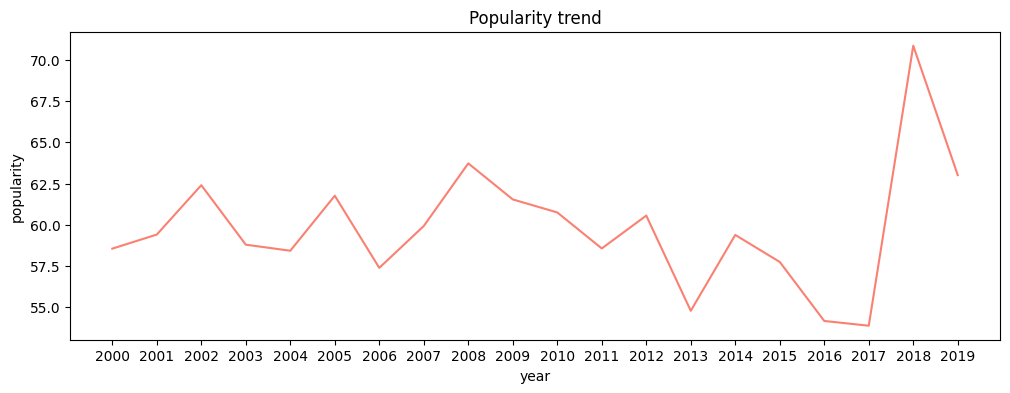

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(hits.groupby("year")["popularity"].mean(), color='salmon')
plt.xticks(range(2000, 2020))
plt.xlabel("year")
plt.ylabel("popularity")
plt.title("Popularity trend")

По графику видно, что средняя популярность треков достигла своего минимального значения в 2017 году, а в 2018 - резко возросла до максимума.

###Построим гистограммы распределений параметров песен.

<ipython-input-9-fe6b2faacb2d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hits['tempo'], ax=axes[0], color="m")
<ipython-input-9-fe6b2faacb2d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hits['valence'], ax=axes[1], color="m")
<ipython-input-9-fe6b2faacb2d>:5: UserWarning: 

`distplot

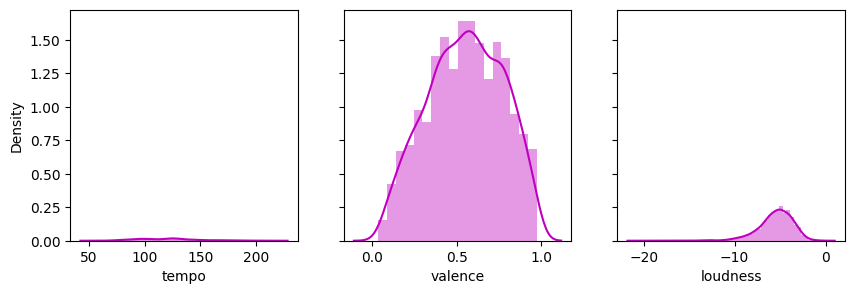

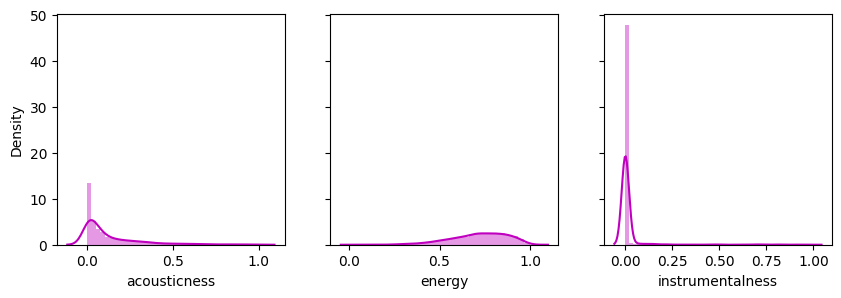

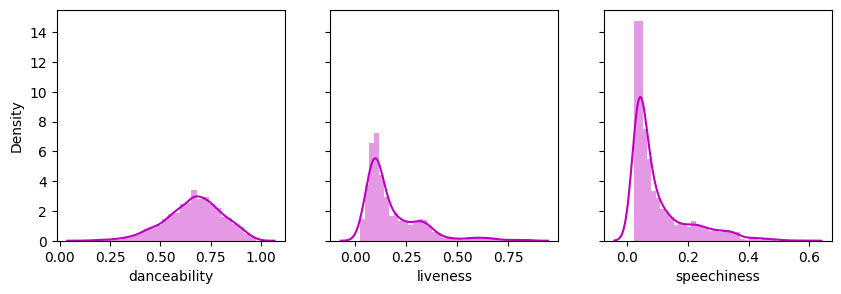

In [9]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 3))

sns.distplot(hits['tempo'], ax=axes[0], color="m")
sns.distplot(hits['valence'], ax=axes[1], color="m")
sns.distplot(hits['loudness'], ax=axes[2], color="m")

f, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 3))
sns.distplot(hits['acousticness'], ax=axes[0], color="m")
sns.distplot(hits['energy'], ax=axes[1], color="m")
sns.distplot(hits['instrumentalness'], ax=axes[2], color="m")

f, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 3))
sns.distplot(hits['danceability'], ax=axes[0], color="m")
sns.distplot(hits['liveness'], ax=axes[1], color="m")
sns.distplot(hits['speechiness'], ax=axes[2], color="m") 
plt.show()


Хиты 2000-2019 обладают довольно высокой энергией (в среднем 0.75), при этом имеют довольно низкие значения акустики, инструментальности, живого исполнения и текста. Громкость хитов распределена нормально со средним -5, а среднее значение танцевальности составляет примерно 0,65.

###Проверим, зависит ли популярность от жанра.

Сначала построим сводную таблицу

In [10]:
popularity_vs_genre = pd.crosstab(hits["popularity"], hits["genre"])
popularity_vs_genre

genre,Dance/Electronic,"Folk/Acoustic, pop","Folk/Acoustic, rock","Folk/Acoustic, rock, pop",R&B,"World/Traditional, Folk/Acoustic","World/Traditional, hip hop","World/Traditional, pop","World/Traditional, pop, Folk/Acoustic","World/Traditional, rock",...,"rock, blues","rock, blues, latin","rock, classical","rock, easy listening","rock, metal","rock, pop","rock, pop, Dance/Electronic","rock, pop, metal","rock, pop, metal, Dance/Electronic",set()
popularity,,,,,,,,,,,,,,,,,,,,,
0,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Проведем тест хи-квадрат для проверки независимости.

In [11]:
sci.chi2_contingency(popularity_vs_genre)

Chi2ContingencyResult(statistic=4291.347339073146, pvalue=0.42709484630607936, dof=4275, expected_freq=array([[2.57405516e+00, 1.28702758e-01, 6.43513790e-02, ...,
        2.57405516e-01, 6.43513790e-02, 1.35137896e+00],
       [6.33299285e-01, 3.16649642e-02, 1.58324821e-02, ...,
        6.33299285e-02, 1.58324821e-02, 3.32482125e-01],
       [2.24719101e-01, 1.12359551e-02, 5.61797753e-03, ...,
        2.24719101e-02, 5.61797753e-03, 1.17977528e-01],
       ...,
       [2.04290092e-02, 1.02145046e-03, 5.10725230e-04, ...,
        2.04290092e-03, 5.10725230e-04, 1.07252298e-02],
       [2.04290092e-02, 1.02145046e-03, 5.10725230e-04, ...,
        2.04290092e-03, 5.10725230e-04, 1.07252298e-02],
       [2.04290092e-02, 1.02145046e-03, 5.10725230e-04, ...,
        2.04290092e-03, 5.10725230e-04, 1.07252298e-02]]))

P-value больше 0.05, значит на 5% уровне значимости принимаем гипотезу о независимости.

### **Вывод**: популярность треков не зависит от их жанра.

###Какие песни популярнее: грустные или веселые?
В Spotify есть параметр valence: эта величина в интервале от 0.0 до 1.0 описывает музыкальную позитивность, передаваемую песней. Песни с высокой valence звучат более позитивно, а песни с низкой valence звучат негативнее.

Сделаем фильтр по valence и проведем т-тест для сравнения средних, не принимая равенство дисперсий.

In [12]:
positive = hits["valence"] >= 0.5
positive_hits = hits[positive]
sad = hits["valence"] < 0.5
sad_hits = hits[sad]
sci.ttest_ind(positive_hits["popularity"], sad_hits["popularity"], equal_var=False)

Ttest_indResult(statistic=-1.0663470779757924, pvalue=0.2864232144861244)

Получили значение p-value больше 0.05, значит на 5% уровне значимости принимаем гипотезу о равенстве средних.

###**Вывод**: Средняя популярность грустных песен достоверно не отличается от популярности веселых.

###Теперь построим попарные корреляции числовых признаков.

<Axes: >

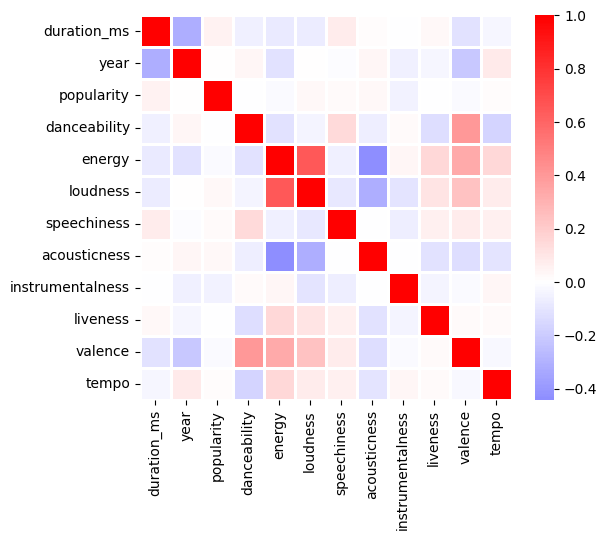

In [13]:
hits_num = hits[["duration_ms", "year", "popularity", "danceability", "energy",	"loudness", "speechiness", "acousticness", "instrumentalness", "liveness","valence","tempo"]]
plt.figure(figsize=(6, 5))
sns.heatmap(hits_num.corr(), cmap="bwr", center=0, linewidths=1)

###Построим графики совместных распределений для некоторых параметров с положительной корреляцией.

Text(0, 0.5, 'valence')

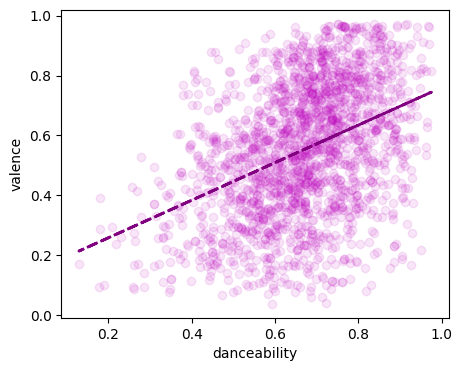

In [14]:
plt.figure(figsize=(5, 4))
x = hits["danceability"]
y = hits["valence"]
plt.scatter(x, y, color="m", marker="o", alpha=0.1)
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)
plt.plot (x, p(x), ls="--", lw=2, color="purple") 
plt.xlabel("danceability")
plt.ylabel("valence")

Text(0, 0.5, 'loudness')

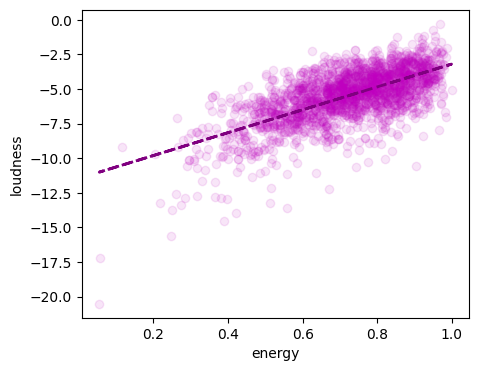

In [15]:
plt.figure(figsize=(5, 4))
x = hits["energy"]
y = hits["loudness"]
plt.scatter(x, y, color="m", marker="o", alpha=0.1)
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)
plt.plot (x, p(x), ls="--", lw=2, color="purple") 
plt.xlabel("energy")
plt.ylabel("loudness")

Наблюдается положительная корреляция между танцевальностью и уровнем позитива, а также между энергией и громкостью.

###Теперь построим те же графики для параметров с отрицательной корреляцией.

Text(0, 0.5, 'duration_ms')

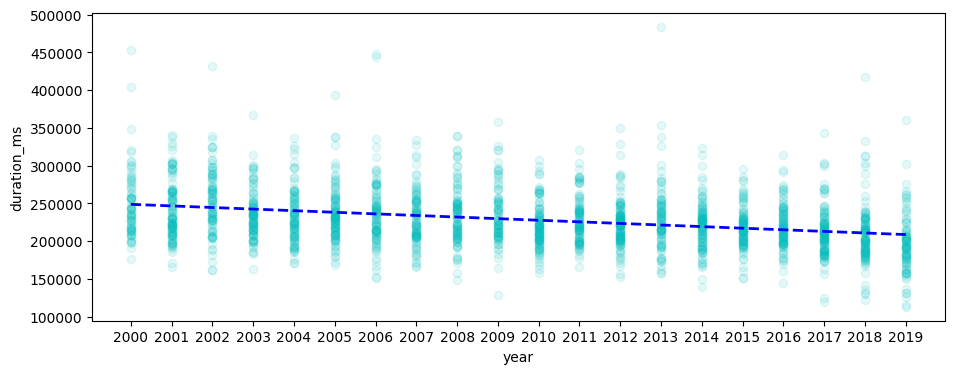

In [16]:
plt.figure(figsize=(11, 4))
x = hits["year"]
y = hits["duration_ms"]
plt.scatter(x, y, color="c", marker="o", alpha=0.1)
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)
plt.plot (x, p(x), ls="--", lw=2, color="blue") 
plt.xticks(range(2000, 2020))
plt.xlabel("year")
plt.ylabel("duration_ms")

Text(0, 0.5, 'loudness')

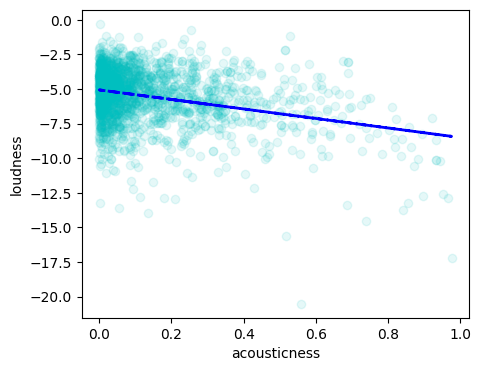

In [17]:
plt.figure(figsize=(5, 4))
x = hits["acousticness"]
y = hits["loudness"]
plt.scatter(x, y, color="c", marker="o", alpha=0.1)
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)
plt.plot (x, p(x), ls="--", lw=2, color="b")
plt.xlabel("acousticness")
plt.ylabel("loudness")

Видно, что со временем хиты становились всё короче. А также наблюдается отрицательная корреляция между акустикой и громкостью.

###**Общие выводы**: 
*   Топ-3 исполнителя 2000-2019 - это Rihanna, Drake и Eminem
*   Больше всего хитов было выпущено в 2012 году
*   При этом средняя популярность треков была самой высокой в 2018 году и самой низкой - в 2017
*   Хиты 2000-2019 достаточно энергичные и танцевальные. При этом они обладают довольно низкими значениями акустики, инструментальности, живого исполнения и имеют мало текста
*   Популярность треков не зависит от их жанра
*   Грустные и веселые песни примерно одинаково популярны
*   Танцевальность хитов положительно коррелирует с позитивностью, а энергия - с громкостью
*   Акустика хитов отрицательно коррелирует с громкостью, а год - с длительностью







